# AdventureWorks Sales Analysis
**Author:** Ali Akyel

**Date:** January 4, 2026

## 1. Project Overview
**Data Source:** This project analyzes the AdventureWorks2025 database, which contains sales and product data for a bicycle manufacturer.

**Purpose:** The goal is to answer 8 specific business questions to understand the company's performance. We are looking for clear answers in three main areas:
1.  **Sales & Trends:** Are sales growing year-over-year?
2.  **Regional Performance:** Which regions and customer types (B2B vs. Individuals) spend the most?
3.  **Profitability:** Which products are making money, and which ones are actually losing money?

**Method:**
* **SQL:** Used to select, join, and aggregate the raw data from the database.
* **Python:** Used to visualize the results and for the final profitability calculations.
---

## Setup & Configuration
*Importing necessary libraries and establishing the database connection.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import numpy as np
import warnings

from sqlalchemy import create_engine, text
from urllib.parse import quote_plus

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')


server = '.\\SQLEXPRESS'
database = 'AdventureWorks2025'
driver = quote_plus("ODBC Driver 17 for SQL server")


connection_string = (
    f"mssql+pyodbc://@{server}/{database}"
    f"?driver={driver}&trusted_connection=yes&Encrypt=yes&TrustServerCertificate=yes"
)

engine = create_engine(connection_string)


try:
    engine = create_engine(connection_string)
    # Test connection
    with engine.connect() as conn:
        print("✅ Connection Successful! Libraries loaded.")
except Exception as e:
    print(f"❌ Connection Failed: {e}")

def query_df(sql: str):
    with engine.connect() as conn:
        return pd.read_sql(text(sql), conn)
    

✅ Connection Successful! Libraries loaded.


## 1. Number of Products per Category

**Business Question:** How many products are there in each category?

**Method:** I queried the `Product`, `ProductSubcategory`, and `ProductCategory` tables to count the unique `ProductID`s grouped by `CategoryName`. I visualized this using a bar chart to show the inventory scale differences.

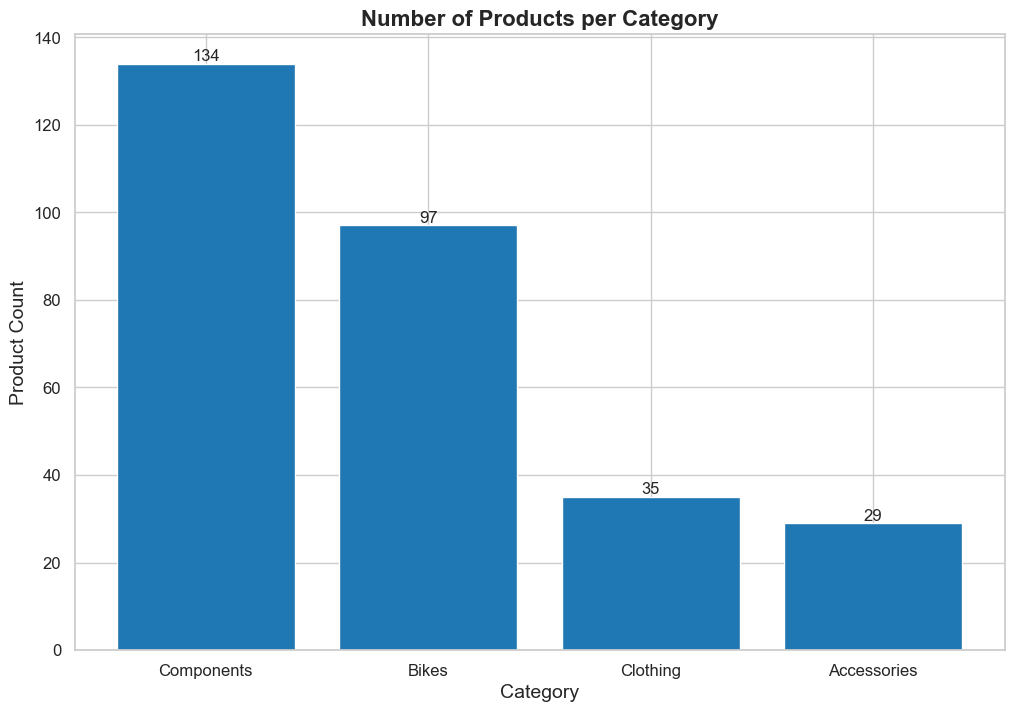

Product Inventory Summary:


CategoryName,ProductCount
Components,134
Bikes,97
Clothing,35
Accessories,29


In [2]:
with open('../data/query1.sql', 'r') as file:
    query_q1 = file.read()

df_q1 = pd.read_sql(query_q1, engine)

plt.figure(figsize=(12, 8))
bars = plt.bar(df_q1['CategoryName'], df_q1['ProductCount'], color='#1f77b4')

plt.title('Number of Products per Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Product Count', fontsize=14)
plt.bar_label(bars)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

print("Product Inventory Summary:")

display(df_q1.sort_values(by='ProductCount', ascending=False).style.hide(axis='index'))

### 💡 **Key Findings**

1. **Components** has the highest number of products, **134**. This indicates that Adventure Works provides a broad range of spare parts for bikes. 
2. **Bikes** follow with **97** models, which shows that Adventure Works primarily sells bikes and spare parts for the bikes. 
3. **Clothing** (35) and **Accessories** (29) have significantly fewer distinct products, serving as cross-sell opportunities rather than core offerings.


<a id="q2"></a>

## 2. Revenue by Product Category

**Business Question:** Which product categories generate the most revenue for AdventureWorks?

**Method:** I joined the sales transaction data (`SalesOrderDetail`) with the product hierarchy tables (`Product`, `Subcategory`, `Category`). I aggregated the total sales (`LineTotal`) by category and visualized the revenue distribution using a bar chart to identify the primary financial drivers.

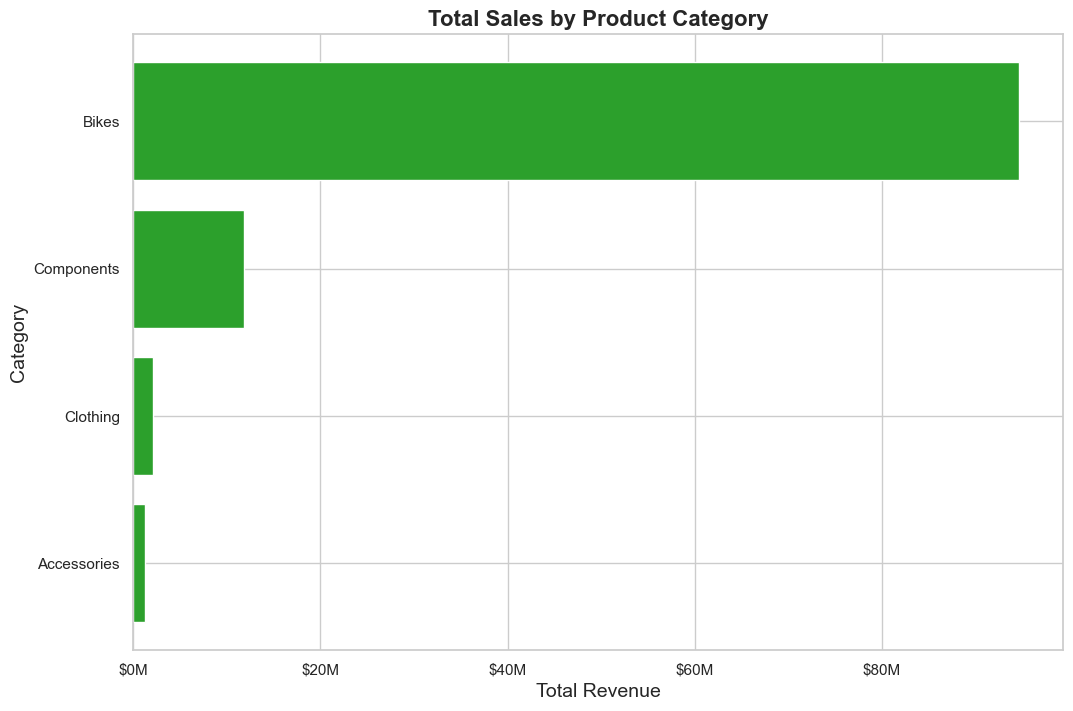

Revenue Contribution by Category:


CategoryName,TotalSales,Share of Total
Bikes,"$94,651,172.70",86.2%
Components,"$11,802,593.29",10.7%
Clothing,"$2,120,542.52",1.9%
Accessories,"$1,272,072.88",1.2%


In [3]:
with open('../data/query2.sql', 'r') as file:
    query_q2 = file.read()

df_q2 = pd.read_sql(query_q2, engine)

plt.figure(figsize=(12, 8))

bars = plt.barh(df_q2['CategoryName'], df_q2['TotalSales'], color='#2ca02c')

plt.title('Total Sales by Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Total Revenue', fontsize=14)
plt.ylabel('Category', fontsize=14)

plt.gca().invert_yaxis()

plt.ticklabel_format(style='plain', axis='x')

ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '${:,.0f}M'.format(x/1_000_000)))

plt.show()

print("Revenue Contribution by Category:")

df_q2['Share of Total'] = (df_q2['TotalSales'] / df_q2['TotalSales'].sum()) * 100

display(df_q2.sort_values(by='TotalSales', ascending=False).style.format({
    'TotalSales': '${:,.2f}',
    'Share of Total': '{:.1f}%'
}).hide(axis='index'))

### 💡 **Key Findings**

1. **The Powerhouse:** **Bikes** are the overwhelming revenue driver, generating over **$94 Million**. This accounts for about **86%** of total company sales.
2. **Secondary Streams:** **Components** and **Clothing/Accessories** contribute significantly less revenue. While essential for a complete customer offering, they are not the primary drivers of top-line growth.

## 3. Sales Trends over Time

**Business Question:** How has revenue changed over time? Are there visible trends or seasonality?

**Method:** I aggregated the `SalesOrderHeader` data by `OrderDate` (grouped by Month) to calculate total sales. I visualized this using a line chart to identify growth patterns and seasonal peaks.

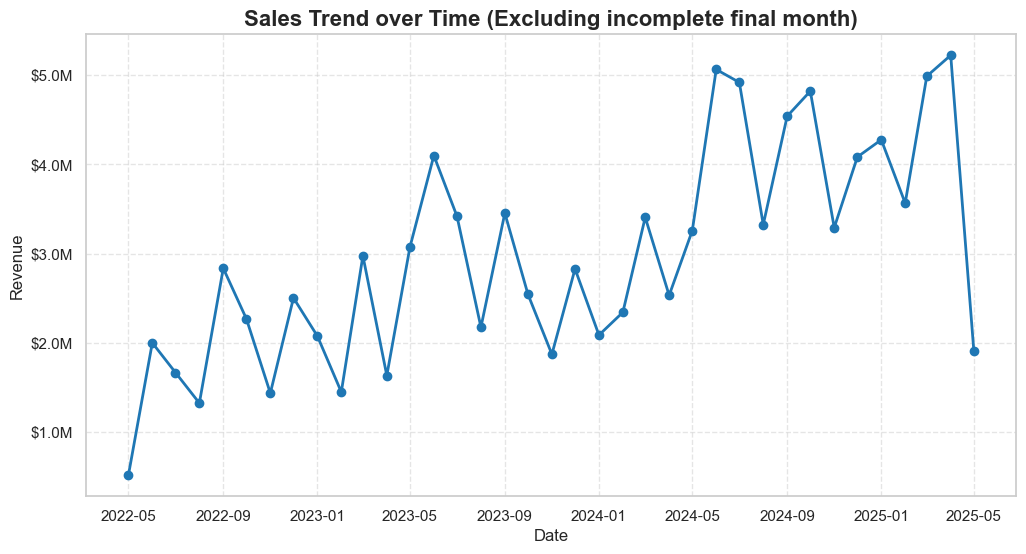

Months with Positive Growth (Upside Trend):


,OrderDate,TotalSales,Growth
1,2022-06-01,"$2,001,279","+$1,483,542"
4,2022-09-01,"$2,836,410","+$1,510,272"
7,2022-12-01,"$2,504,196","+$1,066,854"
10,2023-03-01,"$2,975,748","+$1,525,865"
12,2023-05-01,"$3,074,603","+$1,440,002"
13,2023-06-01,"$4,099,354","+$1,024,752"
16,2023-09-01,"$3,454,152","+$1,278,515"
19,2023-12-01,"$2,829,405","+$956,703"
21,2024-02-01,"$2,343,260","+$255,388"
22,2024-03-01,"$3,407,037","+$1,063,777"


In [4]:
with open('../data/query3.sql', 'r') as file:
    query_q3 = file.read()

df_q3 = pd.read_sql(query_q3, engine)
df_q3['OrderDate'] = pd.to_datetime(df_q3['OrderDate'])

df_q3 = df_q3.iloc[:-1] 

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_q3['OrderDate'], df_q3['TotalSales'], marker='o', linestyle='-', color='#1f77b4', linewidth=2)

ax.set_title('Sales Trend over Time (Excluding incomplete final month)', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Revenue', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)


def currency_formatter(x, pos):
    if x >= 1_000_000:
        return '${:,.1f}M'.format(x * 1e-6)
    return '${:,.0f}K'.format(x * 1e-3)

ax.yaxis.set_major_formatter(mticker.FuncFormatter(currency_formatter))

plt.show()

df_q3['Growth'] = df_q3['TotalSales'].diff()

upside_months = df_q3[df_q3['Growth'] > 0].copy()

display_table = upside_months.copy()
display_table['TotalSales'] = display_table['TotalSales'].map('${:,.0f}'.format)
display_table['Growth'] = display_table['Growth'].map('+${:,.0f}'.format) 

print("Months with Positive Growth (Upside Trend):")
display(display_table[['OrderDate', 'TotalSales', 'Growth']])

### 💡 **Key Findings**

1. **The "Quarter-End" Phenomenon:**
A clear pattern emerges at the end of financial quarters. There are consistent growth spikes in **March, June, September, and December**. This strongly suggests that sales performance is driven by **quarterly targets and quotas**, where sales teams push to close deals before the period ends.

2. **Seasonal Anchors:**
* **December:** Consistently high performance correlates with the global holiday gift-giving season.
* **Mid-Year (June):** aligns with the start of the summer cycling season in the Northern Hemisphere.

3. **Anomalies & Action Items:**
Spikes in off-season months like **February and October** are irregularities.
* *Hypothesis:* These could be driven by specific marketing campaigns, clearance sales, or new model launches (e.g., announcing next year's bike models in autumn).
* *Recommendation:* Investigate historical marketing calendars to correlate these spikes with specific promotional events.


## 4. Sales and Order Count per Year

**Business Question:** How do total sales and order volume compare year over year?

**Method:** I extracted sales data grouped by year, calculating `SUM(SubTotal)` for revenue and `COUNT(SalesOrderID)` for order volume. I visualized this using **two side-by-side bar charts** to independently assess the scale of revenue growth versus order frequency.

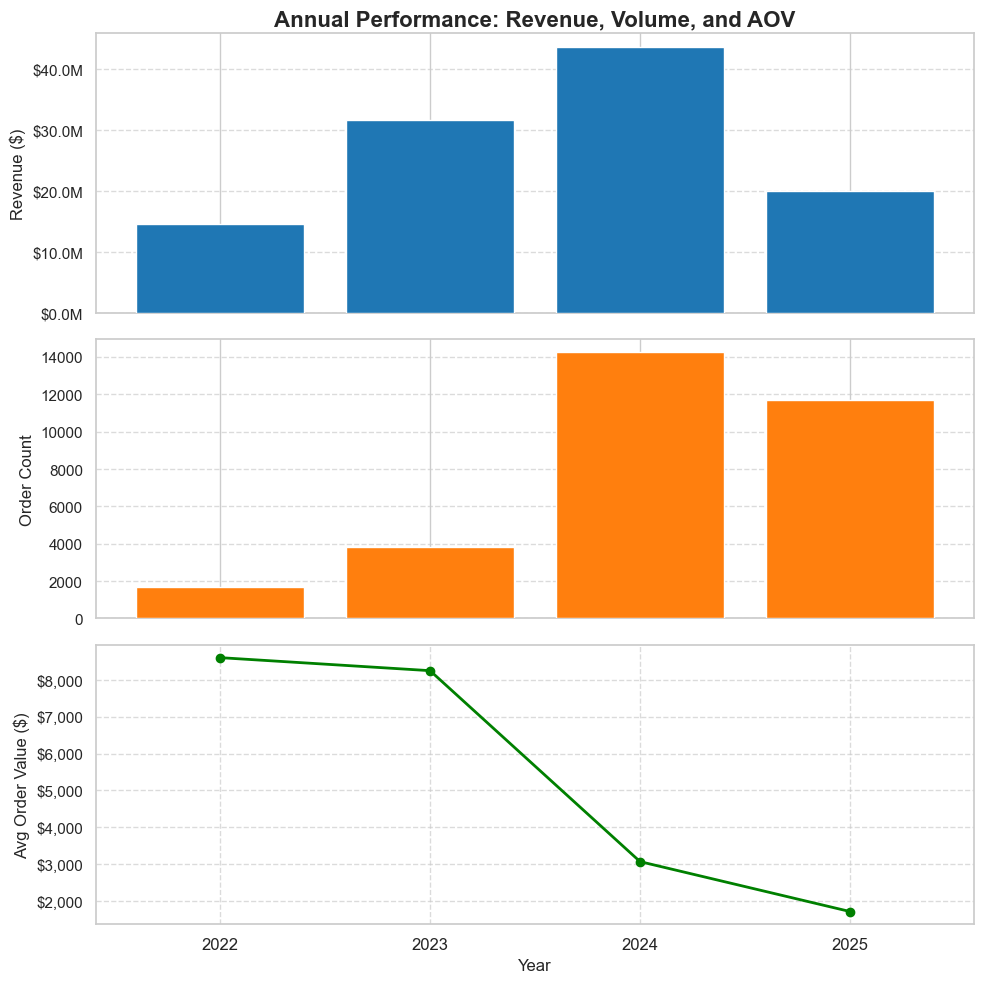

Annual Performance Summary:


,OrderYear,TotalSales,OrderCount,AOV
0,2022,"$14,561,051.59",1692,"$8,605.82"
1,2023,"$31,604,921.95",3830,"$8,251.94"
2,2024,"$43,671,889.50",14244,"$3,065.98"
3,2025,"$20,008,518.36",11699,"$1,710.28"


In [5]:
with open('../data/query4.sql', 'r') as file:
    query_q4 = file.read()

df_q4 = pd.read_sql(query_q4, engine)

df_q4['AOV'] = df_q4['TotalSales'] / df_q4['OrderCount']

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Chart 1: Revenue (Top)
ax1.bar(df_q4['OrderYear'], df_q4['TotalSales'], color='#1f77b4', zorder=3)
ax1.set_title('Annual Performance: Revenue, Volume, and AOV', fontsize=16, fontweight='bold')
ax1.set_ylabel('Revenue ($)', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

import matplotlib.ticker as mticker
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '${:,.1f}M'.format(x/1_000_000)))

# Chart 2: Order Count (Middle)
ax2.bar(df_q4['OrderYear'], df_q4['OrderCount'], color='#ff7f0e', zorder=3)
ax2.set_ylabel('Order Count', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

# Chart 3: Average Order Value (Bottom) - The New Metric
ax3.plot(df_q4['OrderYear'], df_q4['AOV'], marker='o', color='green', linewidth=2, zorder=3)
ax3.set_ylabel('Avg Order Value ($)', fontsize=12)
ax3.set_xlabel('Year', fontsize=12)
ax3.grid(True, linestyle='--', alpha=0.7)

ax3.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

plt.xticks(df_q4['OrderYear'], fontsize=12)

plt.tight_layout()
plt.show()

print("Annual Performance Summary:")

formatted_table = df_q4.style.format({
    'TotalSales': '${:,.2f}',
    'AOV': '${:,.2f}'
})

display(formatted_table)

### 💡 **Key Findings:**
1. **Peak Performance:** The years **2022 and 2023** represent the company's peak performance, showing the highest combined total revenue and order volume.
2. **Concerning Trend (AOV Drop):** Starting in **2024**, and continuing into **2025**, there is a significant decrease in **Average Order Value (AOV)**. The average value of a customer's basket has effectively been cut in half compared to the 2022-2023 peaks.
    * *Hypothesis:* This suggests a shift in product mix—we are likely selling more low-cost accessories or components rather than high-ticket items like Bikes.
3. **Data Note (2025):** Data for **2025** is partial (covering only the first half of the year). While this explains the lower *Total Sales*, the low *AOV* remains a valid concern that requires investigation into pricing or product strategy.

## 5. Top 10 Products

**Business Question:** Which 10 products generate the most sales?

**Method:** I queried the `SalesOrderDetail` and `Product` tables, aggregating `LineTotal` by `Name` to calculate total revenue per product. I filtered for the top 10 highest-grossing items and visualized them using a horizontal bar chart to highlight our "best sellers."

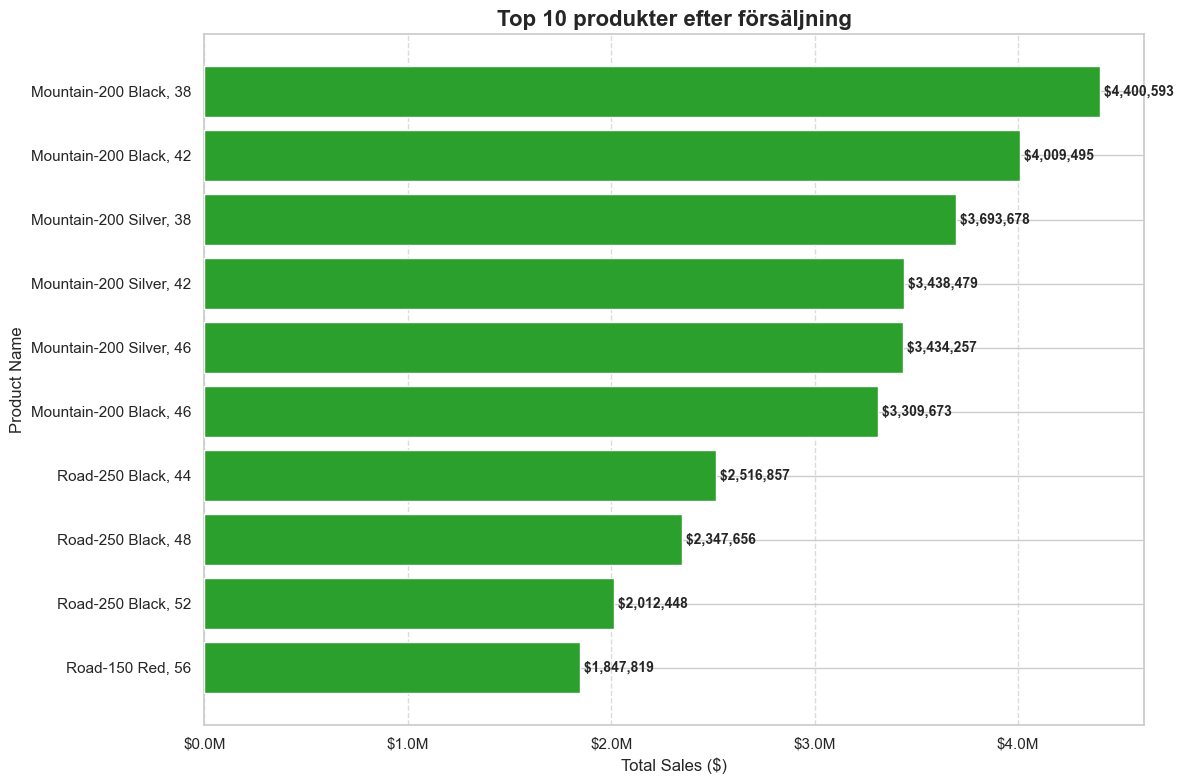

Top 10 Best-Selling Products:


ProductName,TotalSales
"Mountain-200 Black, 38","$4,400,592.80"
"Mountain-200 Black, 42","$4,009,494.76"
"Mountain-200 Silver, 38","$3,693,678.03"
"Mountain-200 Silver, 42","$3,438,478.86"
"Mountain-200 Silver, 46","$3,434,256.94"
"Mountain-200 Black, 46","$3,309,673.22"
"Road-250 Black, 44","$2,516,857.31"
"Road-250 Black, 48","$2,347,655.95"
"Road-250 Black, 52","$2,012,447.77"
"Road-150 Red, 56","$1,847,818.63"


In [6]:
with open('../data/query5.sql', 'r') as file:
    query_q5 = file.read()

df_q5 = pd.read_sql(query_q5, engine)

df_q5_plot = df_q5.sort_values(by='TotalSales', ascending=True)

fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.barh(df_q5_plot['ProductName'], df_q5_plot['TotalSales'], color='#2ca02c', zorder=3)

ax.set_title('Top 10 produkter efter försäljning', fontsize=16, fontweight='bold')
ax.set_xlabel('Total Sales ($)', fontsize=12)
ax.set_ylabel('Product Name', fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7, zorder=0)

ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'${x/1e6:.1f}M'))

for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, 
            f' ${width:,.0f}', 
            va='center', ha='left', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("Top 10 Best-Selling Products:")

display(df_q5.head(10).style.format({
    'TotalSales': '${:,.2f}',
    }).hide(axis='index'))

### 💡 **Key Findings:**

1. **Top Performer:** The Mountain-200 is the standout product, generating $22M in revenue across its various sizes.

2. **Category Dominance:** The Top 10 list consists entirely of bicycles, specifically the Mountain-200 and Road-250 series. This confirms that revenue is driven by high-value bike sales rather than lower-cost components or apparel.

3. **Revenue Concentration:** There is a sharp drop-off after the top performer; the Mountain-200 ($22M) generates more than triple the revenue of the second most popular model, the Road-250 ($7M).

## 6. Sales and Number of Customers by Region

**Business Question:** How do sales differ between different regions, and how many unique customers does each region have?

**Method:** I joined the `SalesOrderHeader` and `SalesTerritory` tables to aggregate data by region. I calculated `SUM(SubTotal)` for Total Sales and `COUNT(DISTINCT CustomerID)` for the number of unique customers. I visualized this to compare the financial value of a region against the size of its customer base.

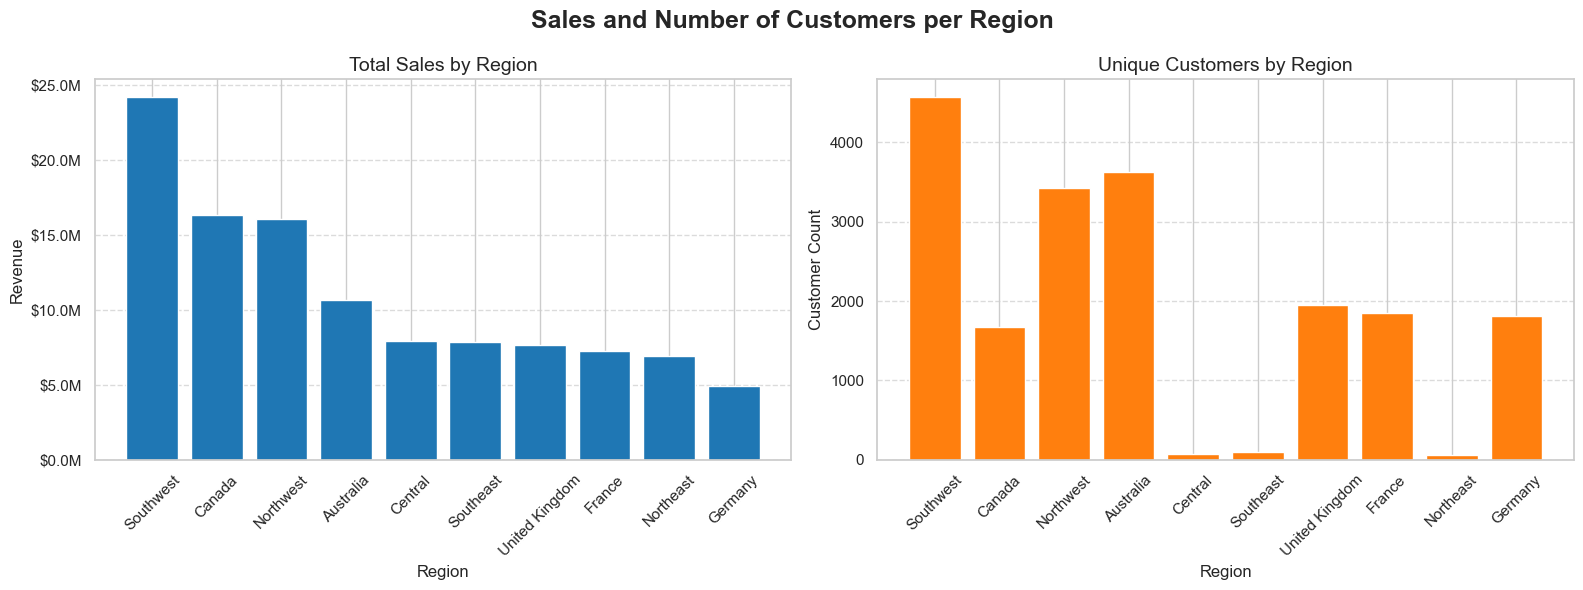

Regional Performance Summary:


RegionName,TotalSales,UniqueCustomers,AvgSpendPerCustomer,Avg Sales per Customer
Southwest,"$24,184,609.60",4565,5297.833428,"$5,297.83"
Canada,"$16,355,770.46",1677,9752.993712,"$9,752.99"
Northwest,"$16,084,942.55",3428,4692.223614,"$4,692.22"
Australia,"$10,655,335.96",3625,2939.403023,"$2,939.40"
Central,"$7,909,009.01",69,114623.318930,"$114,623.32"
Southeast,"$7,879,655.07",91,86589.616188,"$86,589.62"
United Kingdom,"$7,670,721.04",1951,3931.686846,"$3,931.69"
France,"$7,251,555.65",1844,3932.513909,"$3,932.51"
Northeast,"$6,939,374.48",57,121743.411953,"$121,743.41"
Germany,"$4,915,407.60",1812,2712.697349,"$2,712.70"


In [7]:
with open('../data/query6.sql', 'r') as file:
    query_q6 = file.read()

df_q6 = pd.read_sql(query_q6, engine)

df_q6['AvgSpendPerCustomer'] = df_q6['TotalSales'] / df_q6['UniqueCustomers']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# --- Chart 1: Total Sales ---
ax1.bar(df_q6['RegionName'], df_q6['TotalSales'], color='#1f77b4')
ax1.set_title('Total Sales by Region', fontsize=14)
ax1.set_xlabel('Region', fontsize=12)
ax1.set_ylabel('Revenue', fontsize=12)
ax1.tick_params(axis='x', rotation=45) # Rotate labels for readability
ax1.ticklabel_format(style='plain', axis='y')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '${:,.1f}M'.format(x/1_000_000)))

# --- Chart 2: Unique Customers ---
ax2.bar(df_q6['RegionName'], df_q6['UniqueCustomers'], color='#ff7f0e')
ax2.set_title('Unique Customers by Region', fontsize=14)
ax2.set_xlabel('Region', fontsize=12)
ax2.set_ylabel('Customer Count', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Sales and Number of Customers per Region', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

print("Regional Performance Summary:")

df_q6['Avg Sales per Customer'] = df_q6['TotalSales'] / df_q6['UniqueCustomers']


display(df_q6.sort_values(by='TotalSales', ascending=False).style.format({
    'TotalSales': '${:,.2f}',
    'Avg Sales per Customer': '${:,.2f}'
}).hide(axis='index').background_gradient(subset=['TotalSales'], cmap='Blues'))


### 💡 **Key findings**

1. **Market Leader:** The Southwest region leads in both total sales and customer acquisition, maintaining the highest count of unique customers.

2. **Sales vs. Volume:** While Germany reports the lowest total sales, its unique customer base is not the smallest, suggesting a higher volume of low-value transactions.

3. **B2B Indicators:** The Central, Southeast, and Northeast regions show a distinct pattern: they maintain strong sales (approx. $7M each) despite significantly lower customer counts. This high revenue-per-customer ratio indicates a concentration of B2B or wholesale activity in these markets.

## 7. Average Order Value by Region and Customer Type

**Business Question:** Which regions have the highest/lowest average order value, and does it differ between individual and corporate customers?

**Method:** I joined the `SalesOrderHeader`, `Customer`, and `SalesTerritory` tables. I defined customer type as 'Store' or 'Individual' based on the presence of a `StoreID` and calculated the average `SubTotal` per order for each group. I visualized this using a grouped bar chart to compare the spending behavior of these segments.

<Figure size 1400x700 with 0 Axes>

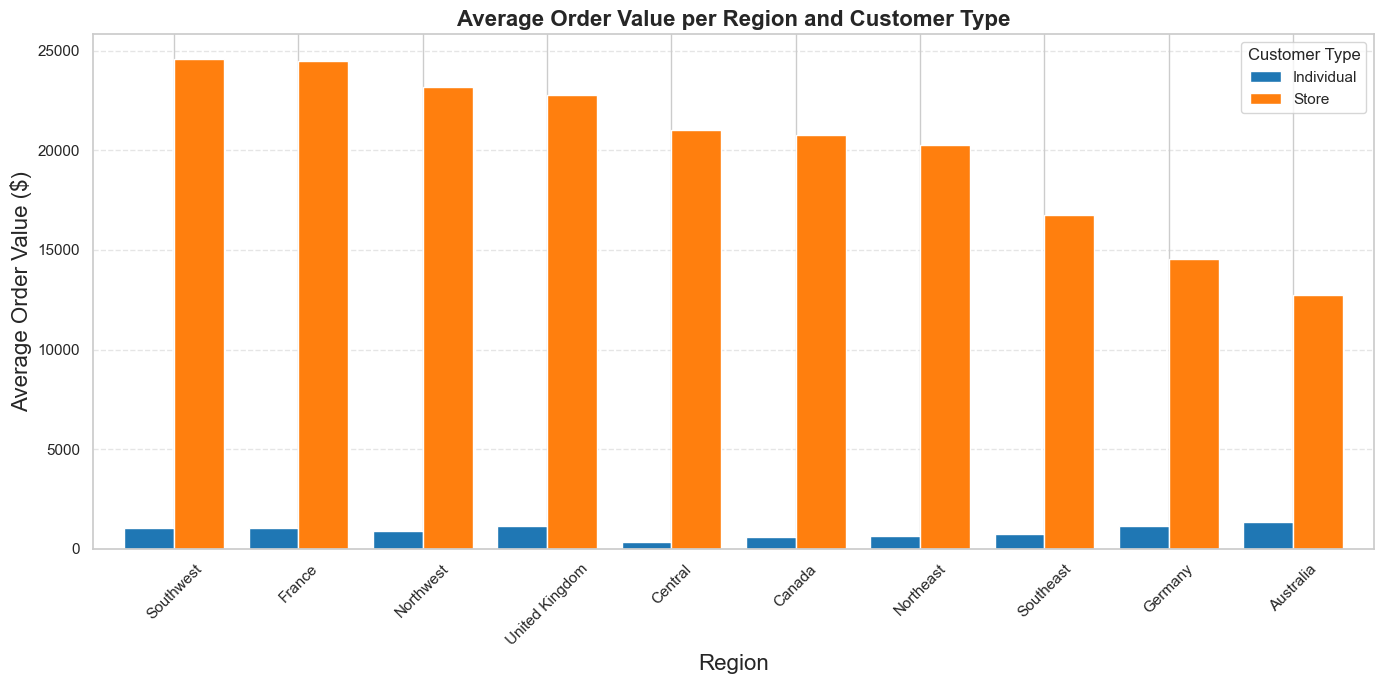

Average Order Value Comparison:


CustomerType,Individual,Store
RegionName,,
Southwest,"$1,044.79","$24,589.16"
France,"$1,064.42","$24,508.18"
Northwest,$899.42,"$23,199.77"
United Kingdom,"$1,119.01","$22,760.69"
Central,$333.43,"$21,026.62"
Canada,$586.03,"$20,777.35"
Northeast,$653.25,"$20,271.47"
Southeast,$719.93,"$16,774.87"
Germany,"$1,165.18","$14,540.25"


In [8]:
with open('../data/query7.sql', 'r') as file:
    query_q7 = file.read()

df_q7 = pd.read_sql(query_q7, engine)

df_pivot = df_q7.pivot(index='RegionName', columns='CustomerType', values='AvgOrderValue')

df_pivot = df_pivot.sort_values(by='Store', ascending=False)

plt.figure(figsize=(14, 7))


df_pivot.plot(kind='bar', figsize=(14, 7), color=['#1f77b4', '#ff7f0e'], width=0.8)

plt.title('Average Order Value per Region and Customer Type', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=16)
plt.ylabel('Average Order Value ($)', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Customer Type')

plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

print("Average Order Value Comparison:")

display(df_pivot.style.format('${:,.2f}'))

### 💡 **Key Findings:**
1. **Store vs. Individual:** The massive gap between customer types is structural. "Store" customers are B2B retailers purchasing bulk inventory for resale (Wholesale), whereas "Individual" customers purchase single units for personal use (Retail).
2. **Regional Differences:** There is a notable disparity between regions regarding average order value. **France** and the **Southwest** region show the strongest numbers. Meanwhile, the **Southeast**, **Germany**, and **Australia** lag behind, with average order values $7K–$10K lower than the top performers. The significant AOV gap between regions suggests a difference in partner scale. France and Southwest likely rely on large-scale distributors or major retail chains placing big orders. In contrast, Germany and Australia likely consist of smaller, local bike shops placing smaller orders.

## Deep Dive: Product Portfolio Analysis

**Why this deep dive?**
I chose the **Product Portfolio Analysis** because revenue alone is misleading. A product can have high sales but negative profit if the cost structure is too high. This analysis reveals the *true* health of the business by focusing on margins rather than just volume.

**Methodology: SQL vs. Pandas**
* **SQL (The Heavy Lifting):** I used SQL for the aggregation of `SUM` (Revenue, Cost, Quantity). Performing these calculations on the database server is significantly faster than pulling millions of raw rows into memory.
* **Pandas (The Precision):** I used Python to calculate the final `Margin %` ratio and reshape the data. Specifically, I used a **Pivot Table** to list exact values, which made it easier to pinpoint specific "Loser" products than just hovering over the scatter plot.

**Choice of Visualizations:**
1.  **Scatter Plot:** Selected to instantly spot outliers—separating the "Stars" (high revenue/high profit) from the "Problems" (high revenue/low profit).
2.  **Bar Chart (Subcategory Profit):** Used to visualize the net profit across different segments. The diverging color scale (Red/Green) allows for instant identification of subcategories that are losing money.
3.  **Box Plot (Distribution):** I added this to see the *consistency* of our margins. It clearly shows that while Bikes are profitable, **Clothing** has a wide, unpredictable spread with many items dipping below the break-even line.

**Challenges & Solutions:**
* **Challenge:** The Scatter Plot was excellent for patterns but difficult to read for exact values due to the density of points.
* **Solution:** I solved this by appending a structured **Pandas Pivot Table** below the visualizations. This allows the stakeholder to look up the precise financial metrics for the top and bottom performers identified in the charts.

**Concrete Recommendation:**
The data confirms that **Clothing** is our riskiest category. We should immediately discontinue the specific clothing SKUs identified in the pivot table that have negative margins, as they are dragging down the company's overall efficiency.

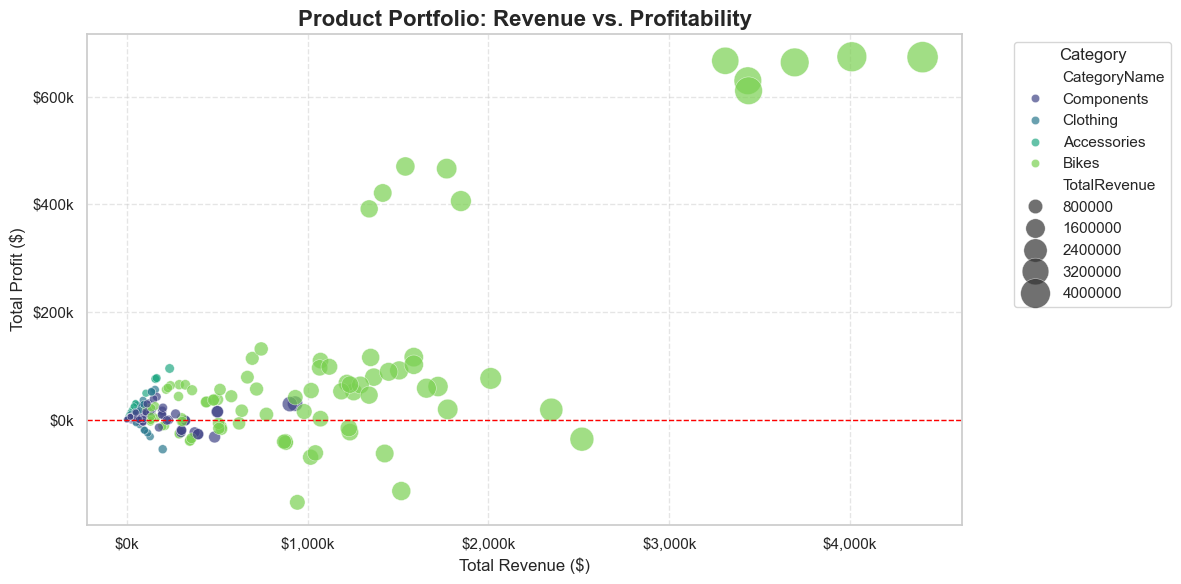

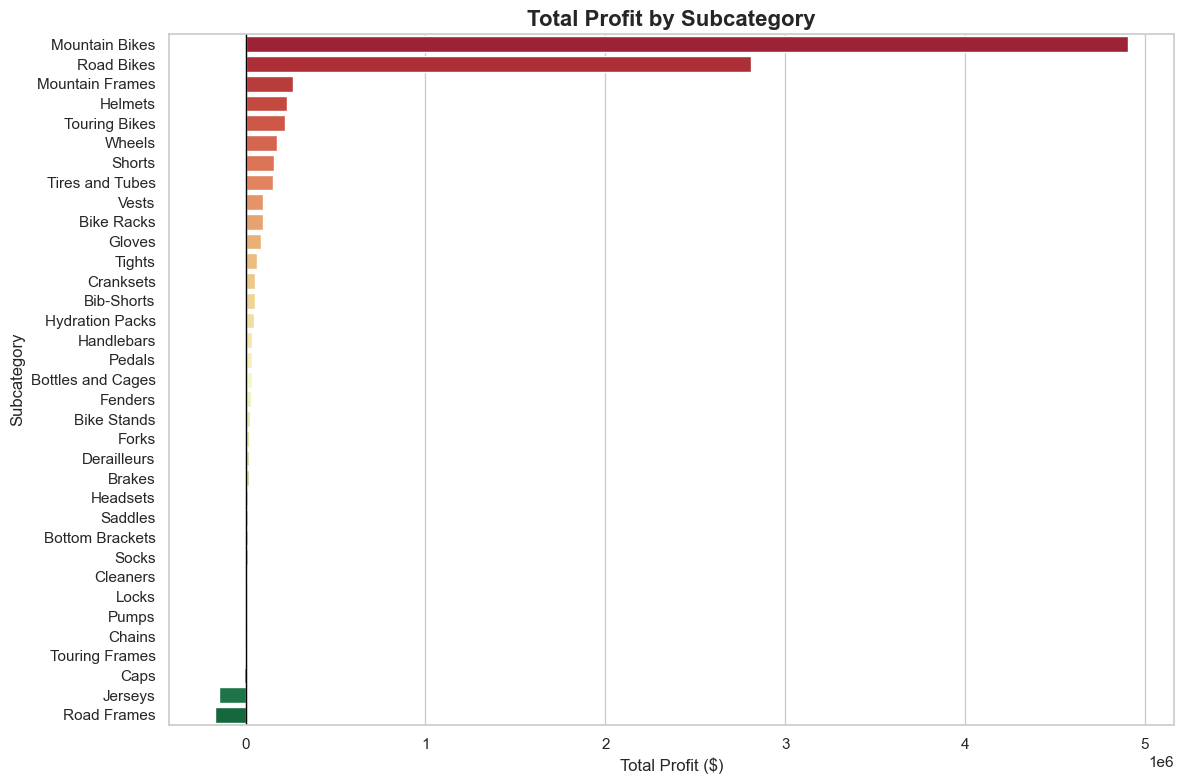

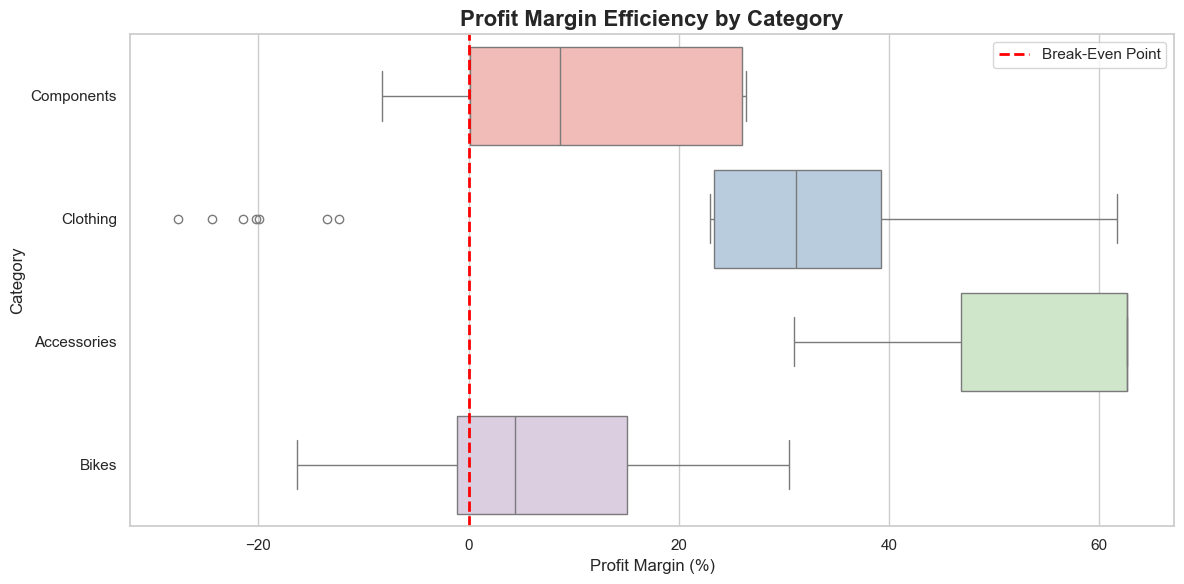

Detailed Product Performance (Top 5 Winners & Bottom 5 Losers):


,ProductName,CategoryName,TotalRevenue,TotalProfit,Margin_Percent
39,"Mountain-200 Black, 42",Bikes,"$4,009,494.76","$674,216.58",16.8%
218,"Mountain-200 Black, 38",Bikes,"$4,400,592.80","$673,444.47",15.3%
70,"Mountain-200 Black, 46",Bikes,"$3,309,673.22","$666,740.69",20.1%
249,"Mountain-200 Silver, 38",Bikes,"$3,693,678.03","$663,784.94",18.0%
40,"Mountain-200 Silver, 46",Bikes,"$3,434,256.94","$629,644.13",18.3%
240,"Road-650 Black, 52",Bikes,"$1,042,909.78","$-61,914.20",-5.9%
19,"Touring-1000 Yellow, 46",Bikes,"$1,426,372.87","$-62,974.72",-4.4%
3,"Road-650 Red, 60",Bikes,"$1,016,529.02","$-69,800.11",-6.9%
22,"Touring-1000 Yellow, 60",Bikes,"$1,518,133.10","$-132,745.72",-8.7%
229,"Road-650 Red, 44",Bikes,"$943,340.56","$-153,696.12",-16.3%


In [9]:
try:
    with open('../data/query_b1.sql', 'r') as file:
        query_b1 = file.read()
    
    df_q8 = pd.read_sql(query_b1, engine)
    
except FileNotFoundError:
    print("❌ Error: Could not find 'query_b1.sql'. Check the file path.")

df_q8['Margin_Percent'] = ((df_q8['TotalRevenue'] - df_q8['TotalCost']) / df_q8['TotalRevenue']) * 100

# --- VISUALIZATION 1: Scatter Plot (Winners vs. Losers) ---
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_q8,
    x='TotalRevenue',
    y='TotalProfit',
    hue='CategoryName',
    size='TotalRevenue',
    sizes=(20, 500),
    alpha=0.7,
    palette='viridis'
)
plt.title('Product Portfolio: Revenue vs. Profitability', fontsize=16, fontweight='bold')
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1) # Zero Profit Line
plt.grid(True, linestyle='--', alpha=0.5)

ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: '${:,.0f}k'.format(x/1000)))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda y, _: '${:,.0f}k'.format(y/1000)))
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- VISUALIZATION 2: Bar Chart (Profit by Subcategory) ---
plt.figure(figsize=(12, 8))
# Group by Subcategory to declutter
subcat_profit = df_q8.groupby('ProductSubcategoryName')['TotalProfit'].sum().reset_index().sort_values('TotalProfit', ascending=False)

sns.barplot(
    data=subcat_profit,
    x='TotalProfit',
    y='ProductSubcategoryName',
    palette='RdYlGn' # Red to Green colormap
)
plt.title('Total Profit by Subcategory', fontsize=16, fontweight='bold')
plt.xlabel('Total Profit ($)', fontsize=12)
plt.ylabel('Subcategory', fontsize=12)
plt.axvline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

# --- VISUALIZATION 3: Box Plot (Margin Distribution) ---
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_q8,
    x='Margin_Percent',
    y='CategoryName',
    palette='Pastel1'
)
plt.title('Profit Margin Efficiency by Category', fontsize=16, fontweight='bold')
plt.xlabel('Profit Margin (%)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Break-Even Point')
plt.legend()
plt.tight_layout()
plt.show()

# --- DATA OVERVIEW: Pivot Table (Winners & Losers) ---
print("Detailed Product Performance (Top 5 Winners & Bottom 5 Losers):")

df_sorted = df_q8.sort_values(by='TotalProfit', ascending=False)
top_bottom = pd.concat([df_sorted.head(5), df_sorted.tail(5)])

display(top_bottom[['ProductName', 'CategoryName', 'TotalRevenue', 'TotalProfit', 'Margin_Percent']].style.format({
    'TotalRevenue': '${:,.2f}',
    'TotalProfit': '${:,.2f}',
    'Margin_Percent': '{:.1f}%'
}).background_gradient(subset=['TotalProfit', 'Margin_Percent'], cmap='RdYlGn'))

# Executive Summary & Recommendations

### 1. The "Winners": Protect the Core
* **The Profit Engine:** The **Mountain-200** and **Road-150** series are the absolute stars of the portfolio.
* **Category Dominance:** The analysis confirms that **Bikes** are the financial backbone of the company, delivering both high volume and healthy margins.
* **Action:** Marketing budget should be concentrated here to maximize Return on Ad Spend (ROAS).

### 2. The "Losers": Immediate Red Flags
* **Profit Drains:** Specific models, notably **Road-650**, **Touring-1000**, and the **Long-Sleeve Logo Jersey**, are currently generating losses.
* **Action:** These products require immediate intervention. They are occupying inventory space and capital while reducing overall company profitability.

### 3. Subcategory Strategy: Fix vs. Cut
Our deep dive revealed two distinct types of underperformance that require different strategies:

* **A. Strategic Retention (Frames):**
    * *Issue:* **Touring Frames** (-0.3% margin) and **Road Frames** (-4.5% margin) are losing money.
    * *Strategy:* We cannot simply cut these, as they are critical for our brand position as a comprehensive spare parts provider.
    * *Recommendation:* **Retain but Reprice.** A slight price increase on Touring Frames will restore profitability. For Road Frames, we must combine a price increase with manufacturing cost reductions.

* **B. Rationalization (Clothing):**
    * *Issue:* Several products in the **Clothing** category show negative margins exceeding **-10%**.
    * *Strategy:* Unlike frames, these items are not critical to our core value proposition (Bikes).
    * *Recommendation:* **Discontinue Immediately.** These items are purely draining resources without providing strategic value. Stop the financial leakage by removing them from the catalog.
